# SC1015 Mini Project
## Alcoholism and its efffect on Academic Performance
Alcohol consumption among students, especially in universities are extremely common. Studies have shown that approximately 80% of university/college students have consumed alcohol during academic semesters.

Through our Mini-Project, we aim to determine whether alcohol consumption rates pose as a determining factor for one's academic performance, by looking at whether we can predict the final grade of a student based on their level of alcohol consumption.

We found two different datasets from kaggle with similar variables and combined both datasets such that we have more data points to work with, leading to less bias in our analysis.

In [1]:
import numpy as py
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Two different datasets
set_1 = pd.read_csv('Alc1.csv')
set_2 = pd.read_csv('Alc2.csv')

## Initial Look at Data Types
We start of by concatenating both datasets which will serve as our main working set to do analysis with. <br>
Then, we checked the datatypes of all variables in order to find out which variables are numerical and categorical.

Below, some key variables that we will focus more on are Dalc and Walc, which are weekday and weekend alcohol consumption respectively, and G1, G2, G3 which are indicators of first semester grades, second semester grades and final grades respectively.

We already know that Dalc and Walc are represented by numbers 1 to 5 (1 is the lowest and 5 is the highest), and grades are represented from numbers 1 to 20. Both of which were indicated from the source on Kaggle.

In [3]:
# Combine both datasets by concatenating
working_set = pd.concat([set_1, set_2], ignore_index=True, sort=False)
# Check data types of variables
working_set.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Preparing the Dataset
As the working set contains both numerical and categorical variables, we separate them and do analysis on the numerical values first. <br>
This is done because we want to plot a correlation matrix to see Dalc and Walc against the grades, which are all numerical values. 

As there is a set range of values for Dalc, Walc, G1, G2, G3, there is no need to consider outliers for these variables.

At the same time, we can look at the relation of grades to other numerical variables from the same correlation matrix to see if there are any further insights to be gained.


<Axes: >

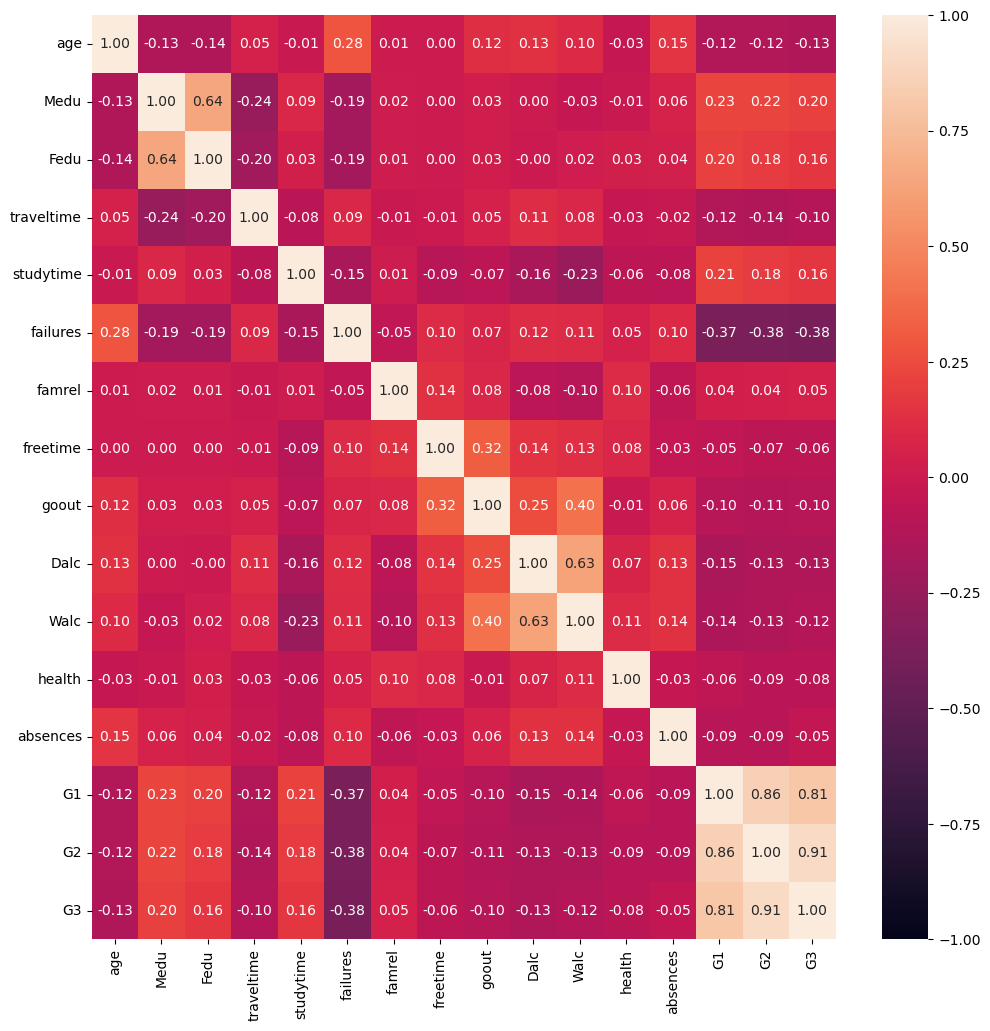

In [4]:
# Dataset with only numeric variables
numeric_only = working_set.select_dtypes(include=py.number)
# Dataset with only categorical variables
categorical_only = working_set.select_dtypes(include=['object'])

# Plotting the correlatin matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numeric_only.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Looking at G1, G2 and G3, which are the exam scores, they seem to be highy correlate to one another. This shows that the performance of a student across the academic year tends to stay consistent, and their performance for each semester is indicative of their final grade.

Hence, we deemed it unnecssary to look at the correlation between G1 and G2 against other numerical values and only consider the correlation with G3, the final grade.

In [5]:
# Drop G1(first period grade) and G2(second period grade) from numeric variables and only include G3(final grade)
numeric_only = numeric_only.drop(['G1', 'G2'], axis=1)

<Axes: >

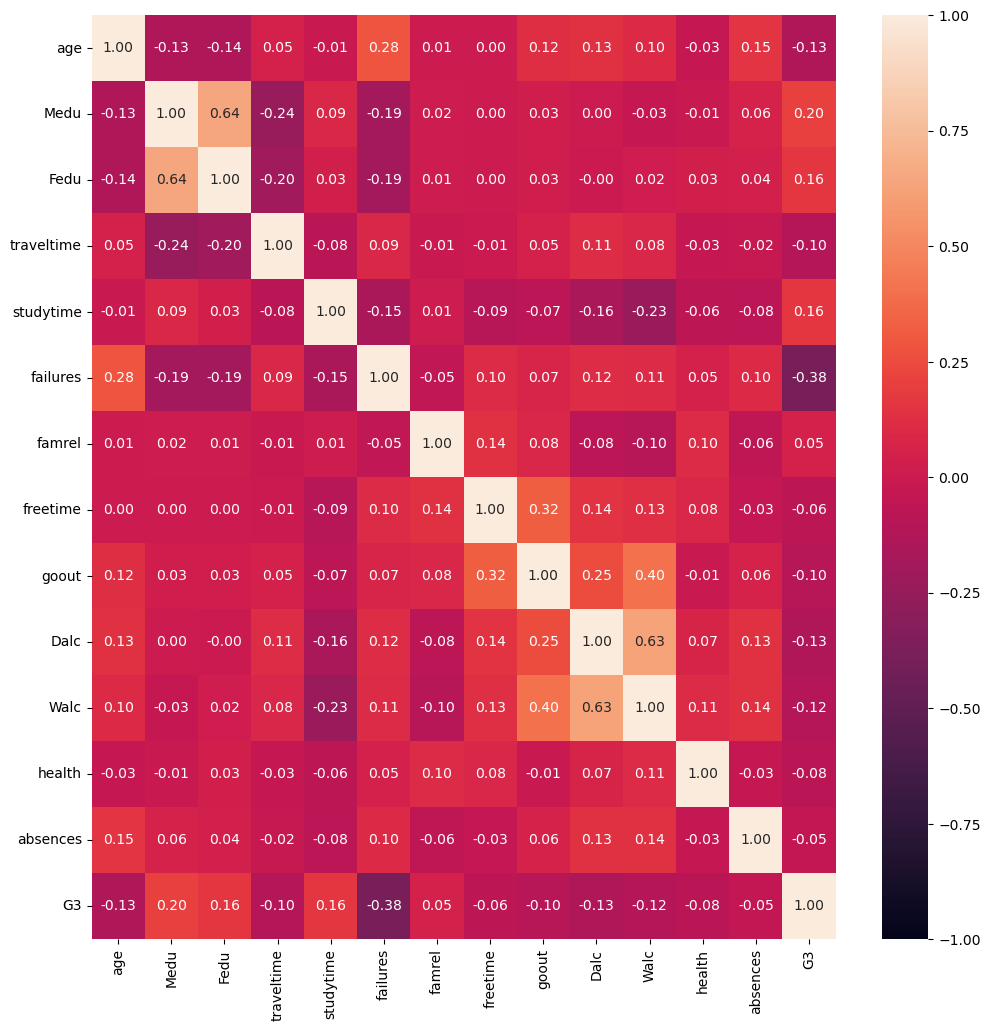

In [6]:
# plot correlation matrix for all numerical variables against G3
f = plt.figure(figsize=(12, 12))
sb.heatmap(numeric_only.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Looking at the correlation value between Dalc (Weekday alcohol consumption) and Walc (Weekend alcohol consumption) against G3 (Final Grade), there seems to be low negative correlation between them. Which indicates that alchohol consumption may lead to lower academic performance, but it is more likely that alcohol consumption does not necessarily affect the academic performance of a student.

Upon further analysis, it would seem that the other factors such as age, parent education, etc. also have a low correlation value with respect to the final grade G3. Hence, it seems like all these factors in our particular dataset are not factors that have a significant effect on G3. 

Henceforth, we decided to potentially use multi-variate regression to check whether a combination of these factors can potentially be a determining factor for academic performance, by looking at whether a particular subset of the factors have a higher correlation with G3.

## Further Analysis and Cleanup on Numerical Variables
Even though it was mentioned previously that Dalc, Walc and G3 (Final Grades) would not have outliers due to the set range it has been defined with, the other numerical variables could potentially have several outliers.

We check the distributions of all numerical variables by plotting boxplot, histograms and violin plot for each variable. 

As seen below, there are some variables such as absences with a large number of outliers. <br>
There are also a number of the variables that are very skewed, such as traveltime, studytime, etc.

Therefore, we need to do further cleanup on the dataset.

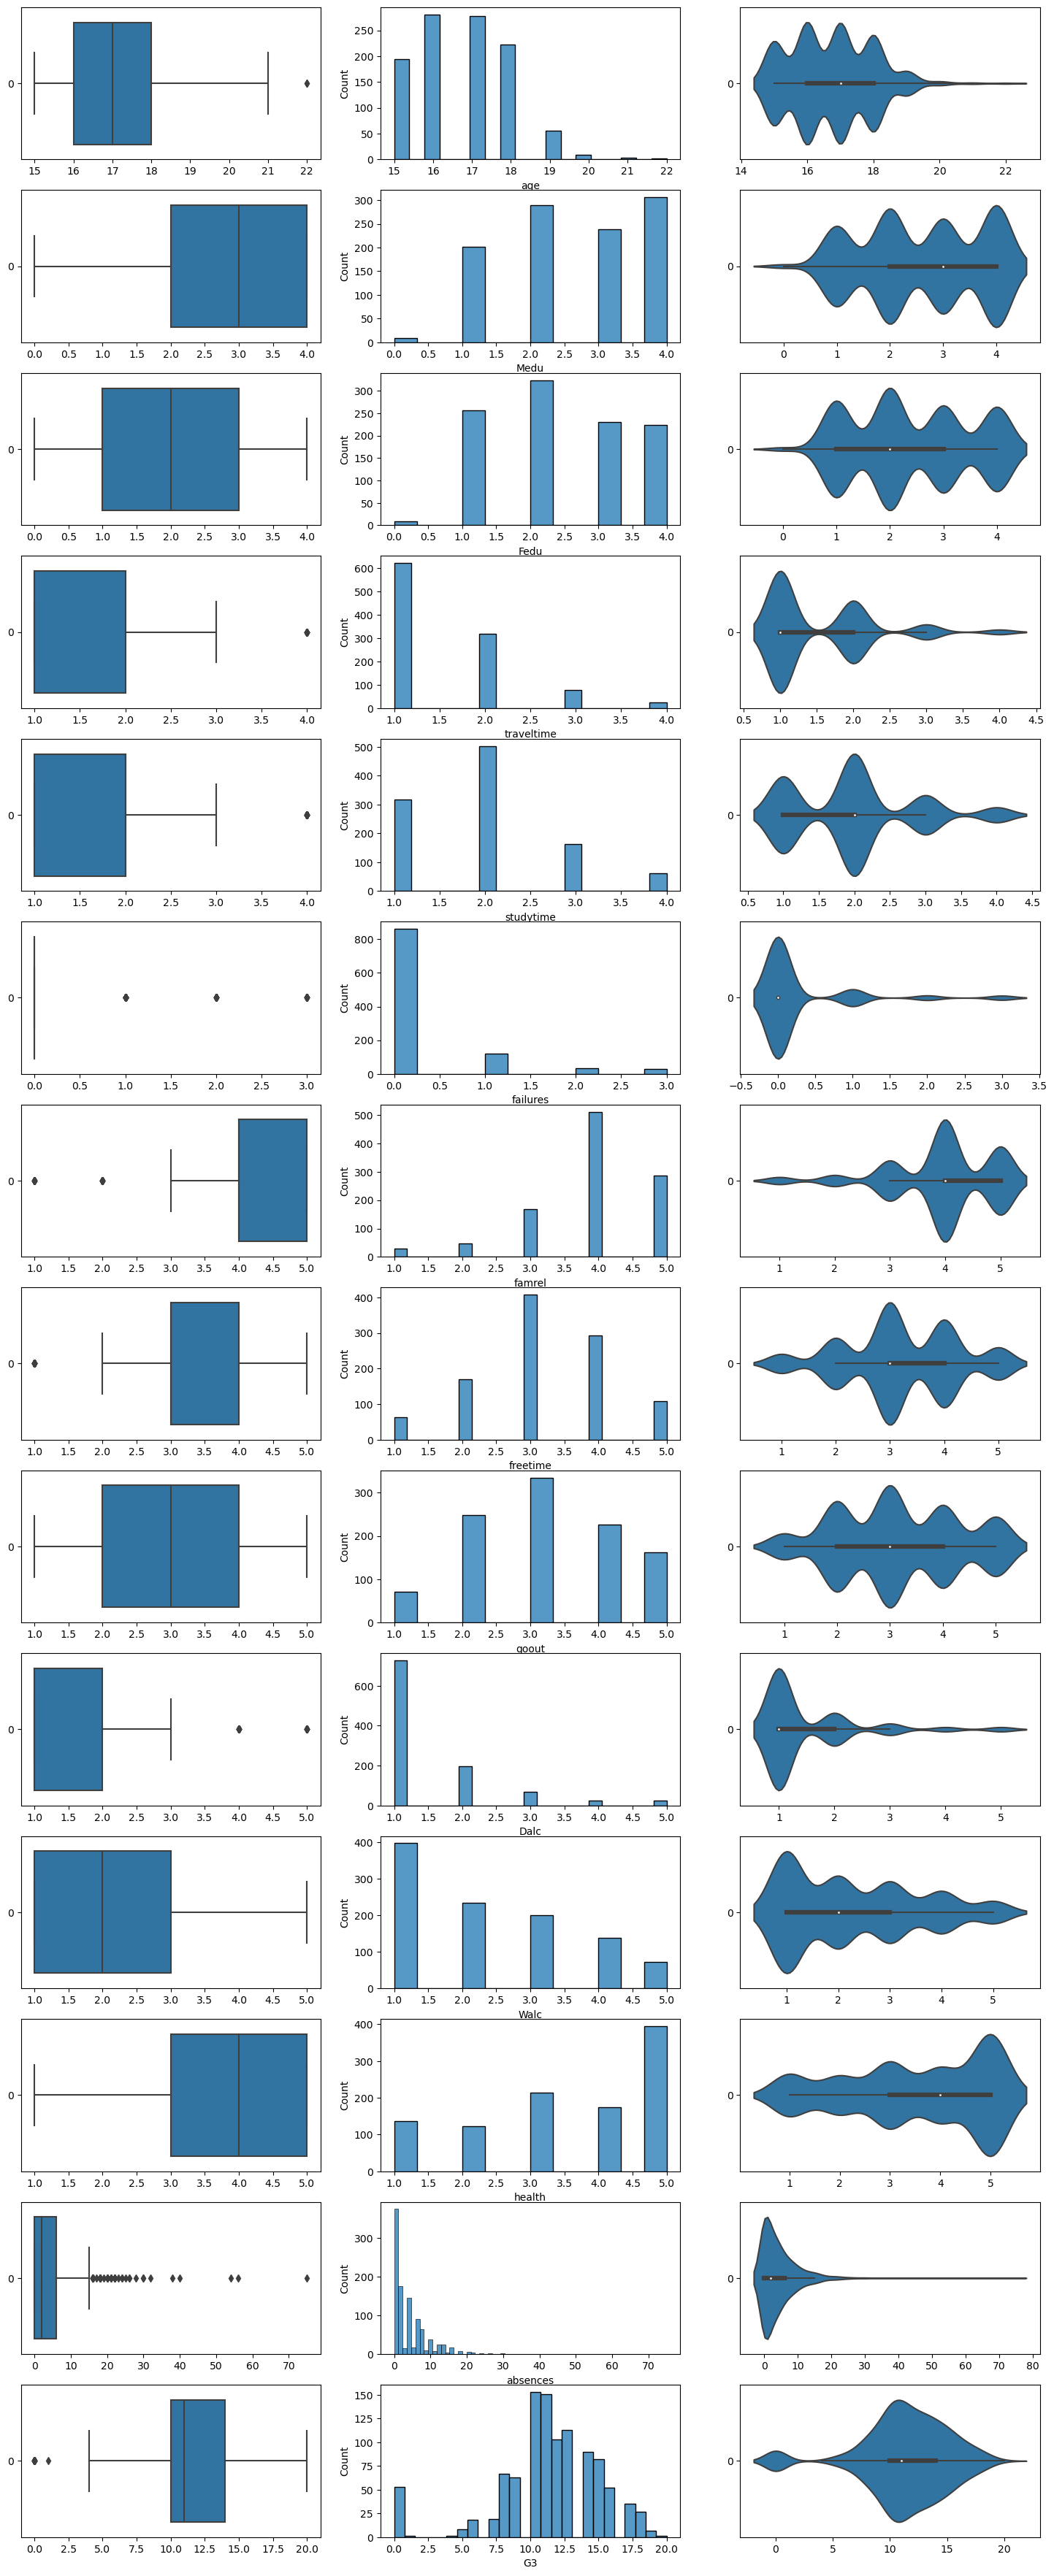

In [7]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(14, 3, figsize=(18, 45))

count = 0
for var in numeric_only:
    sb.boxplot(data = numeric_only[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_only[var], ax = axes[count,1])
    sb.violinplot(data = numeric_only[var], orient = "h", ax = axes[count,2])
    count += 1

### Dealing with Outliers
We will do further cleanup of the numeric_only dataframe to address the outliers by removing them.

In [8]:
# Copy the numeric_only dataframe to avoid modifying the original
numeric_only_cleaned = numeric_only.copy()

# Loop through each numeric variable
for var in numeric_only_cleaned.columns:
    # Calculate the first and third quartiles
    Q1 = numeric_only_cleaned[var].quantile(0.25)
    Q3 = numeric_only_cleaned[var].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers using the IQR method
    outliers_mask = (numeric_only_cleaned[var] < lower_bound) | (numeric_only_cleaned[var] > upper_bound)

    # Replace outliers with NaN
    numeric_only_cleaned.loc[outliers_mask, var] = py.nan
    
    # Replace NaN values with the mean to reduce data skewness
    numeric_only_cleaned = numeric_only_cleaned.fillna(numeric_only_cleaned.mean())

In [9]:
# Checking the distribution of variables after cleaning up outliers
numeric_only_cleaned.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.0,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.715931,2.603448,2.387931,1.464706,1.842159,0.0,4.120993,3.344898,3.156130,1.336694,2.284483,3.543103,3.428283,11.959596
std,1.218236,1.124907,1.099938,0.625236,0.660148,0.0,0.650130,0.864460,1.152575,0.587130,1.285105,1.424703,3.689326,2.816944
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.0,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.0,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.0,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.959596
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.0,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000
max,21.000000,4.000000,4.000000,3.000000,3.000000,0.0,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,15.000000,20.000000


In [10]:
# Remove failures
numeric_only_cleaned = numeric_only_cleaned.drop(["failures"], axis = 1)

As seen above, after removing outliers, we check the distributions of the new dataframe by using .describe().

We can see that there are no failures, hence we can remove failures as one of the variables.

Futhermore, we can tell whether the variables have negative skew or positive skew. 

traveltime, famrel, freetime, Dalc are postively skewed, as their median is equal to their 25th percentile. <br>
studytime is negatively skewed, as the median is equal to its 75th percentile. <br>

These are the variables that we will apply transformations to in order to correct the skewness.

### Correcting Skewness
We will address the variables with highly skewed data.

The variables that have high positive skewness are traveltime, famrel, freetime and Dalc. <br>
To reduce the positive skew, we apply logarithm transformation on the values of the data from these variables.

The variable that has high negative skewness is studytime. <br>
To reduce the negative skew, we square transformation on the values of the data from studytime.

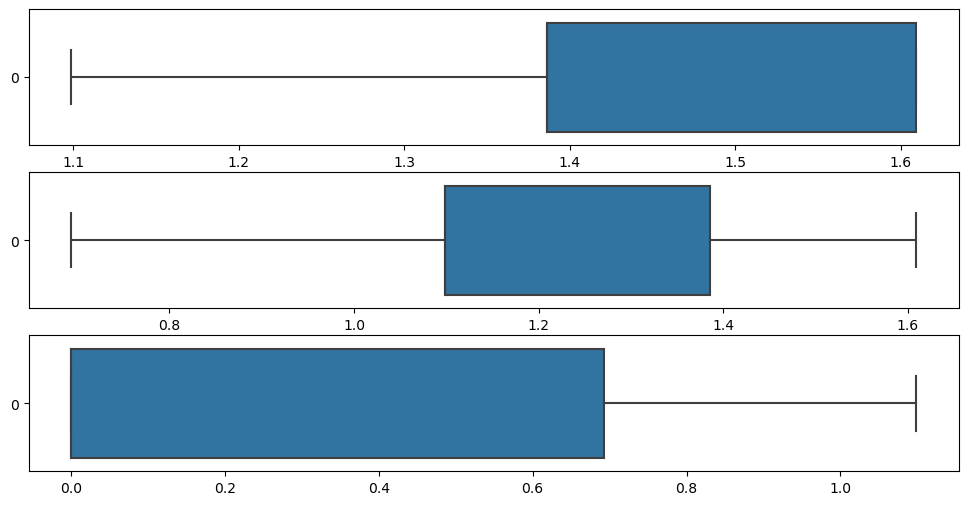

In [11]:
# Extract variables that are postively skewed.
positive_skew = pd.DataFrame(numeric_only_cleaned[["famrel", "freetime", "Dalc"]])
# Apply logarithm transformation on negative_skew
positive_skew_log = pd.DataFrame(positive_skew.apply(py.log))
f, axes = plt.subplots(3, 1, figsize=(12, 6))

count = 0
for var in positive_skew_log:
    sb.boxplot(data = positive_skew_log[var], orient = "h", ax = axes[count])
    count += 1

In [12]:
positive_skew_log.describe()

,famrel,freetime,Dalc
count,1044.000000,1044.000000,1044.000000
mean,1.403052,1.172453,0.217195
std,0.163854,0.269243,0.356528
min,1.098612,0.693147,0.000000
25%,1.386294,1.098612,0.000000
50%,1.386294,1.098612,0.000000
75%,1.609438,1.386294,0.693147
max,1.609438,1.609438,1.098612


After doing logarithm transformation on the positively skewed data, the boxplot distribution still looks the same. 

Upon further consideration, this may be due to the fact that though these variables are numerical variables, they range from 1-5 each representing a certain category. <br>
For example, a "1" for famrel indicates a bad family relationship while a "5" for famrel indicates a really good family relationship. <br>
This shows that these variables are one-hot encoded.

Hence, due to the nature of these variables, the skewness cannot be corrected through transformations. However, they may be able to be corrected through the use of regularization techniques. As we were planning to use multi variate regression as our model, there is an opportunity to use Lasso Regression, that can do perform multi variate regression and apply regularization technique.

## Lasso Regression 

Lasso regression or also known as Least Absolute Shrinkage and Selection Operator, is a regression analysis technique that performs variable selection and regularization to enhance prediction accuracy and interpretivity of the model. 

It achieves this by adding a penalty term to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero. This feature makes LASSO useful for feature selection, as it can automatically identify and discard irrelevant or redundant variables.

Lasso Regression can do feature selection in order to pick out the optimal combination of numerical variables that can give us the best model for predicting G3. As it also performs L1 regularization, it is able to potentially correct the variables that are very skewed. 

In [13]:
# Separate final grade G3 from numerical variables
final_grade = pd.DataFrame(numeric_only_cleaned["G3"])
numeric_only_cleaned = numeric_only_cleaned.drop(["G3"], axis = 1)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
numeric_only_train, numeric_only_test, final_grade_train, final_grade_test = train_test_split(numeric_only_cleaned, final_grade, test_size=0.2, random_state=42)

# Defining a range of alpha values to test
alphas = py.logspace(-4, 2, 100)  # Range of alpha values

# Initialize lists to store mean validation errors for each alpha
mean_errors = []

# Perform cross-validation for each alpha value
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    # Perform cross-validation with 5 folds
    scores = cross_val_score(lasso, numeric_only_cleaned, final_grade, cv=5, scoring='neg_mean_squared_error')
    mean_errors.append(py.mean(py.sqrt(-scores)))

# Find the alpha value with the lowest mean validation error
optimal_alpha = alphas[py.argmin(mean_errors)]

# Perform Lasso regression with optimal alpha value
lasso = Lasso(alpha=optimal_alpha)
lasso.fit(numeric_only_train, final_grade_train)

# Evaluating the model by finding the RMSE value and Explained Variance value
train_pred = lasso.predict(numeric_only_train)
test_pred = lasso.predict(numeric_only_test)

train_rmse = mean_squared_error(final_grade_train, train_pred, squared=False)
test_rmse = mean_squared_error(final_grade_test, test_pred, squared=False)

train_r2 = r2_score(final_grade_train, train_pred)
test_r2 = r2_score(final_grade_test, test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("")
print("Train R2:", train_r2)
print("Test R2:", test_r2)
print("")

# Print out the coefficients and the optimal combination of numerical variables
coefficients = pd.DataFrame({'Variable': numeric_only_cleaned.columns, 'Coefficient': lasso.coef_})
selected_variables = coefficients[coefficients['Coefficient'] != 0]

print("Selected variables:")
print(selected_variables)


Train RMSE: 2.6000121560744534
Test RMSE: 2.6749147923508025

Train R2: 0.15599091098901208
Test R2: 0.05685784815117978

Selected variables:
     Variable  Coefficient
1        Medu     0.502230
2        Fedu     0.088633
4   studytime     0.380298
6    freetime    -0.084079
7       goout    -0.067877
8        Dalc    -0.182413
9        Walc    -0.103922
10     health    -0.171732
11   absences    -0.159855


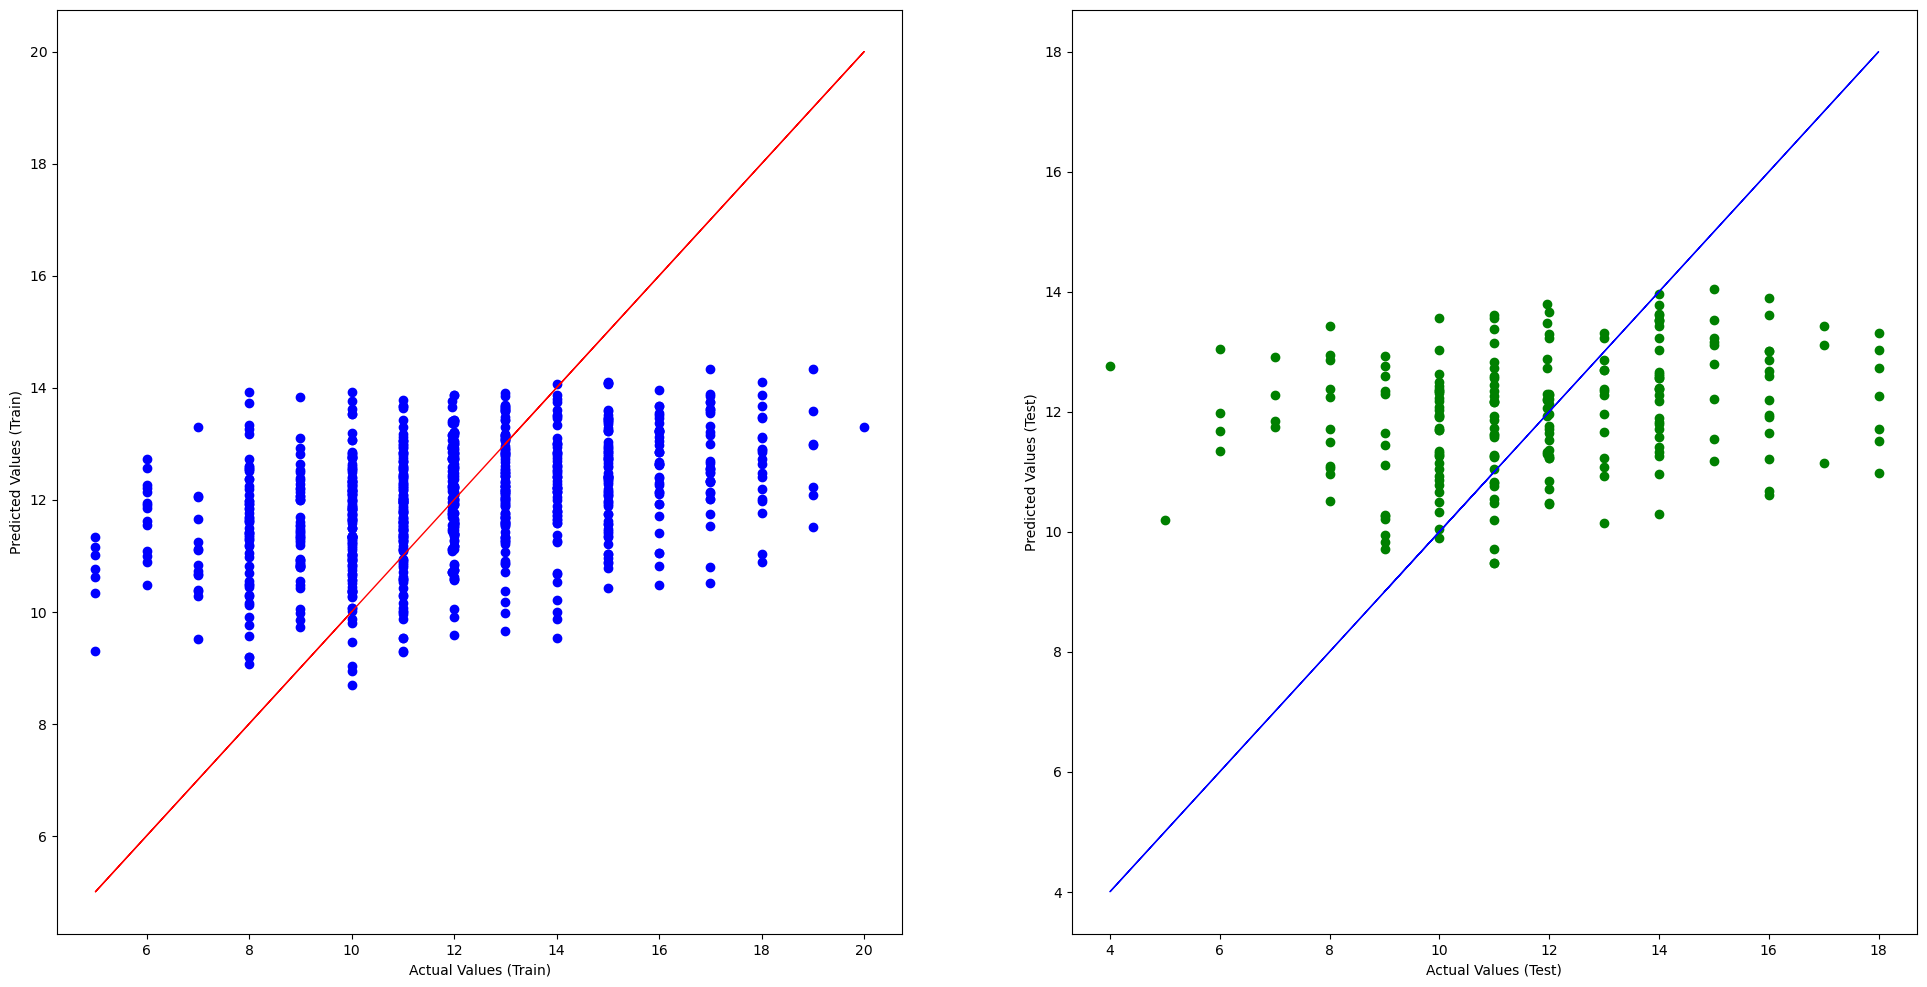

In [15]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

# Scatter plot and regression line for train dataset
axes[0].scatter(final_grade_train, train_pred, color = "blue")
axes[0].plot(final_grade_train, final_grade_train, 'r-', linewidth = 1)
axes[0].set_xlabel("Actual Values (Train)")
axes[0].set_ylabel("Predicted Values (Train)")

# Scatter plot and regression line for test dataset
axes[1].scatter(final_grade_test, test_pred, color = "green")
axes[1].plot(final_grade_test, final_grade_test, 'b-', linewidth = 1)
axes[1].set_xlabel("Actual Values (Test)")
axes[1].set_ylabel("Predicted Values (Test)")
plt.show()

The optimal combination of numeric variables and coefficients consists are shown under Selected Variables above. As seen from the the low R2 value even with the optimal combination of numeric variables, the model performs poorly in order to predict the final grade of students.

We can also see this from the plot of a regression line onto a scatter plot of the predicted final grades against actual final grades for both train and test datasets. The line does not fit well against the scatter plots of both the train and test datasets.

With this we can see that even after considering multiple factors (only numerical) of a student's life and habits, we are unable to predict a student's academic performance. This primarily shows that academic performance is potentially volatile and hard to determine.

## Analysis on Categorical Variables
We first utilise the boxplot to look for potentially relations between G3 and categorical variables.

From below, we notice that variables such as Mjob (Mother's job), Fjob (Father's job), reason (reason for enrolling in school), higher (decision to take higher education) could have potential correlations with G3.

In [16]:
# Join G3 with categorical variables
categorical_only = pd.concat([categorical_only, working_set["G3"]], axis=1) 

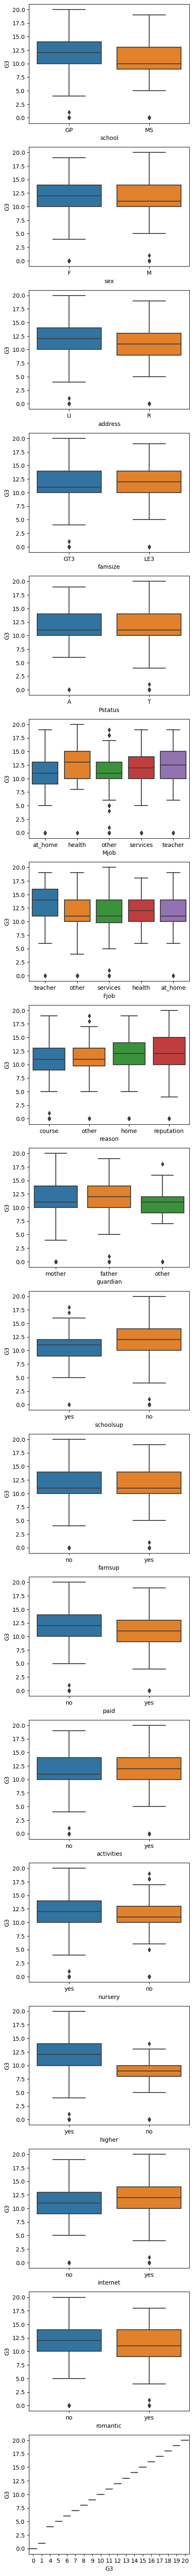

In [17]:
# Plot boxplots to see correlations between G3 and categorical variables
f, axes = plt.subplots(len(categorical_only.columns), 1, figsize=(5, 80))
for col in categorical_only.columns:
    sb.boxplot(y = "G3", x = col, data = categorical_only, ax = axes[categorical_only.columns.get_loc(col)])


In [18]:
# Extracting above mentioned variables
categorical_narrowed = categorical_only[["Mjob", "Fjob", "reason", "higher", "G3"]]

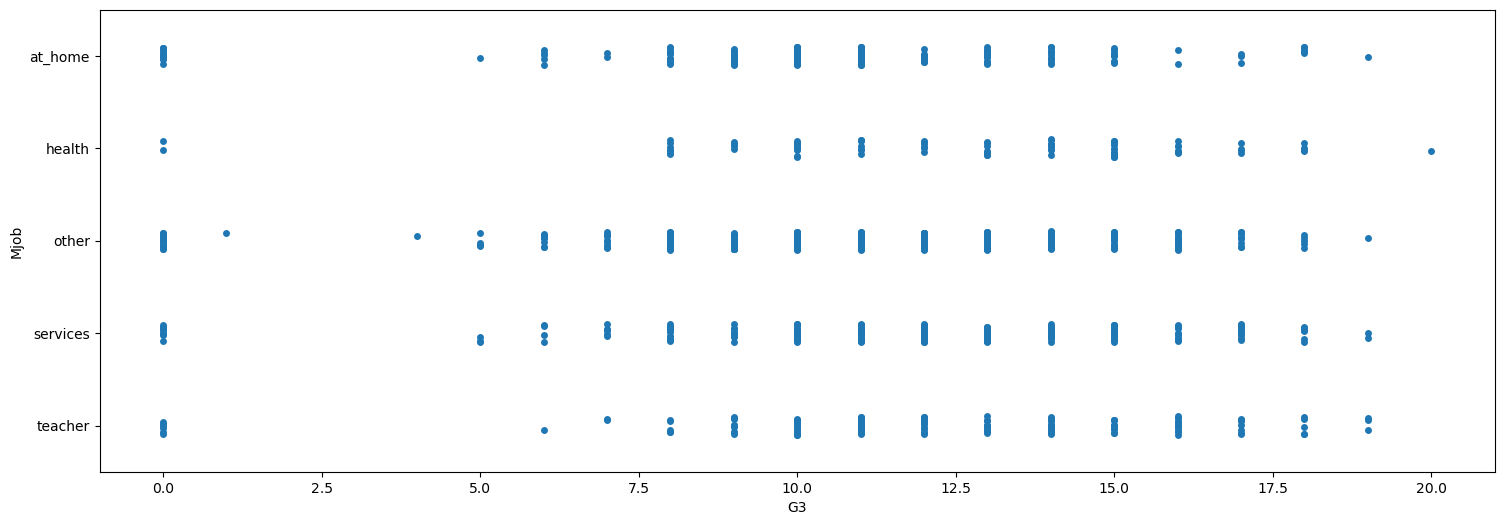

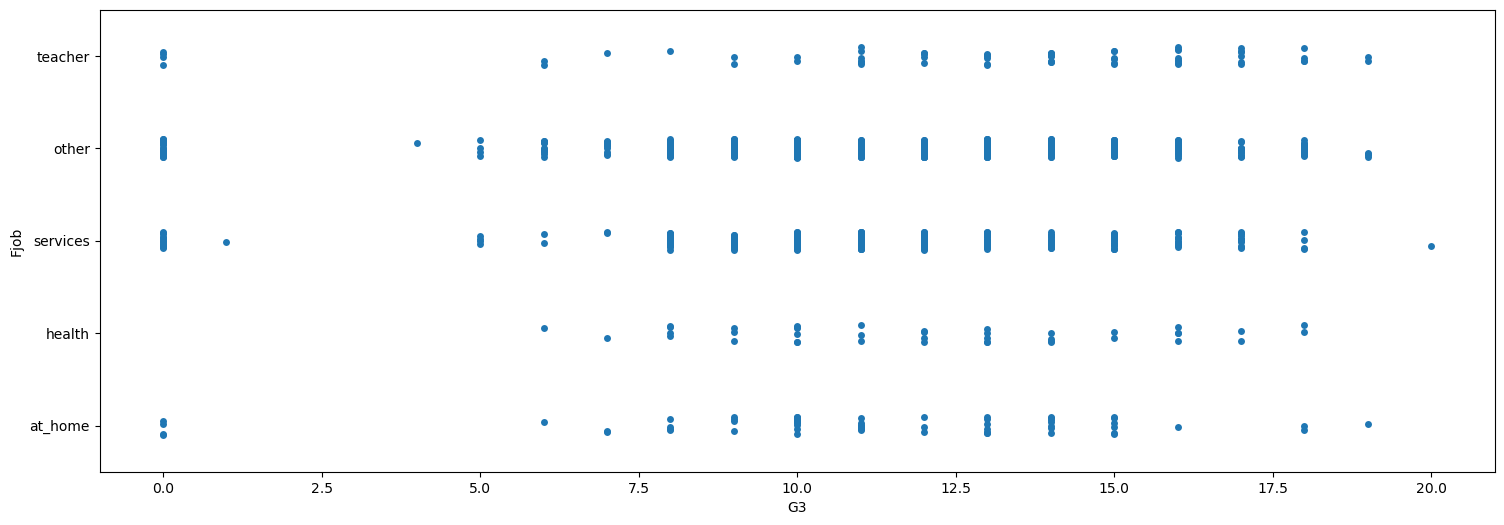

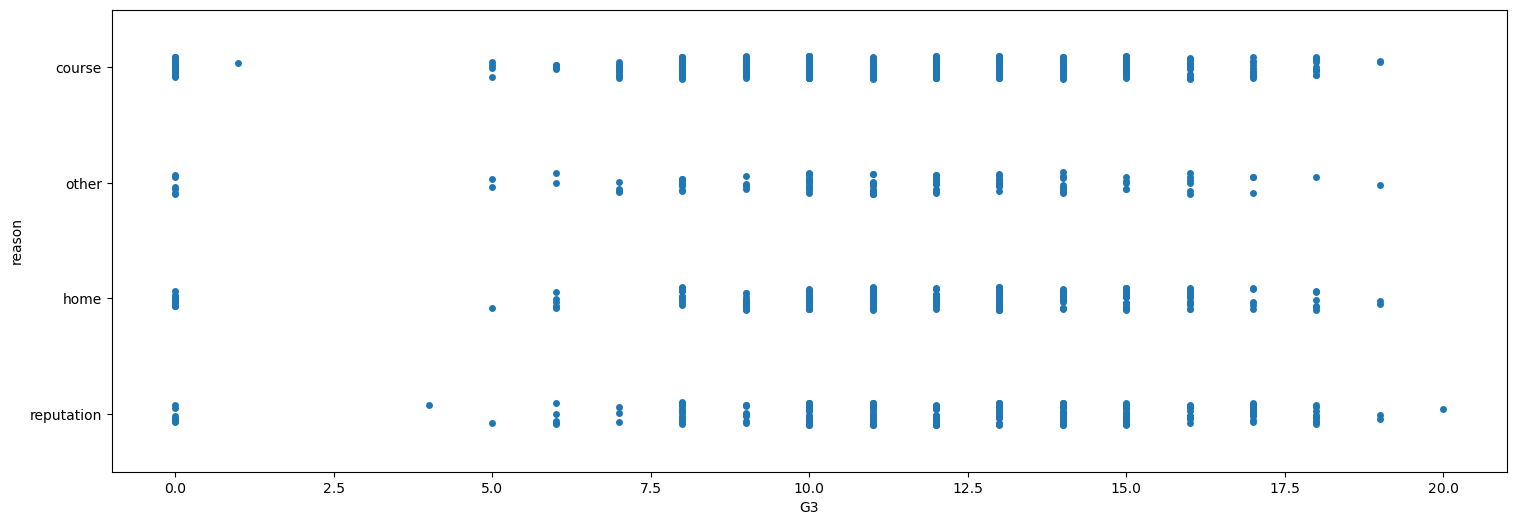

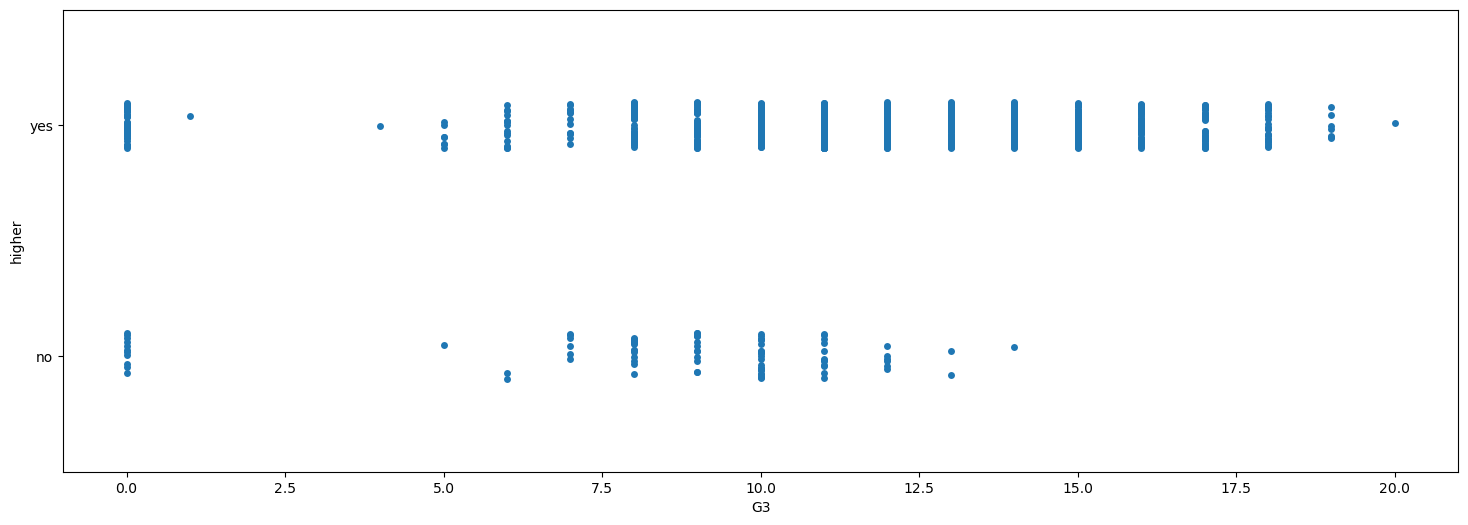

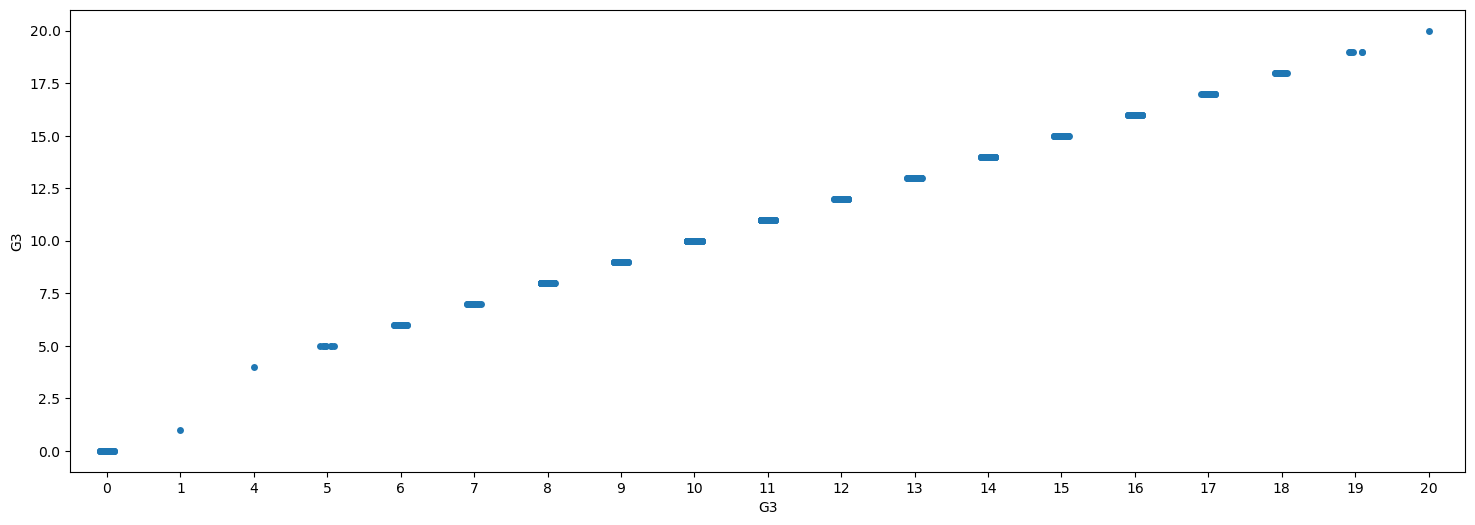

In [19]:
# Plot strip plot
for var in categorical_narrowed:
    f = plt.figure(figsize=(18, 6))
    sb.stripplot(x = "G3", y= var, data = categorical_narrowed, jitter=True)

From above, through the strip plots of the categorical variables picked out, it looks like only higher (whether student wants to take higher education) has a correlation with G3.

## Neural Network with Embedding
To check whether higher is an appropriate variable to predict G3, we need to have a model that can handle categorical variables to predict a numerical variable, such as Neural Network Embedding. 

Neural network embeddings are a way to represent categorical variables as continuous vectors in a lower-dimensional space. These embeddings are learned during the training of the neural network, where the network adjusts the embedding vectors based on the task it's trying to solve.

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.optimizers import Adam

# Ensure same results
tf.random.set_seed(42)

# Extract and separate higher from G3
higher = categorical_narrowed["higher"]
final_grade = categorical_narrowed["G3"]

# Convert higher to binary (1 or 0)
higher_binary = py.array([1 if value == 'yes' else 0 for value in higher])

# Reshape higher_binary for compatibility with keras
higher_binary = higher_binary.reshape(-1, 1)

# Split the data into train and test sets
higher_train, higher_test, G3_train, G3_test = train_test_split(higher_binary, final_grade, test_size=0.2, random_state=42)

# Define embedding dimension
embedding_dim = 100

# Define the model
model = Sequential()
model.add(Embedding(input_dim=2, output_dim=embedding_dim, input_length=1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(higher_train, G3_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(higher_test, G3_test)
print("")
print(f'Test loss: {loss}, Test MAE: {mae}')
mae_updated = ((mae*50)-10.6996-7.4852)/48
print(f'Updated Mae: {mae_updated}')

# Perform test predictions
predictions = model.predict(higher_test)

#Convert G3_test into array
G3_array = G3_test.values

# Print some of the predictions
for i in range(20):  # Print predictions for the first 10 samples
    print(f"Predicted G3: {predictions[i][0]}, Actual G3: {G3_array[i]}")


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 136.8518 - mae: 11.0001 - val_loss: 114.8371 - val_mae: 10.3193
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94.5605 - mae: 9.0691 - val_loss: 41.6749 - val_mae: 5.9326
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.3305 - mae: 4.5408 - val_loss: 12.7440 - val_mae: 2.6642
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.2614 - mae: 3.0817 - val_loss: 11.5778 - val_mae: 2.6062
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.1563 - mae: 2.9726 - val_loss: 11.0640 - val_mae: 2.5469
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.8275 - mae: 2.9206 - val_loss: 10.6928 - val_mae: 2.4902
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.7979 - mae: 2.9001 - val_loss: 10.5945 - val_mae: 2.4767
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.7987 - mae: 2.8884 - val_loss: 10.4841 - val_mae: 2.4562
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

By defining the embedding dimension to be 100 and the epoch to be 20, gave an mean absolute error (MAE) of around 2.8. This means that on average, the deviation from actual G3 (final grade) value is 2.8.

However, looking at the output of the model, epoch 1 and 2 are outliers compared to the other epochs. The MAE could be reduced more, hence we calculate the MAE value without the first 2 epochs. This brings the MAE value down a bit to 2.54.

This could potentially be a factor that can predict the academic performance of a student, but it is not an accurate one. The mean final grade of a student is 11.96, which means that there is on average around 20% error for this model, which is considered very high. 

From above we can see the predicted value against actual value.

## Conclusion
A student's academic performance first and foremost cannot be determined by their level of alcohol consumption. Furthermore, even when multiple variables a factored in the Lasso Regression model, the student's final grade could not be predicted accurately. Hence, this tells us that a student's environment and habits are not necessarily what determines their academic performance.

From our results, the variable from this dataset that has the highest correlation with academic performance is whether the student plans on taking higher education. This makes sense logically, as the student has a motivation and to perform well in order for them to meet the requirements to move on to higher education. Hence, those that said yes will have a typically higher grade than those who said no.

Upon further consideration, as every student is unique, the effect to which each variable will have on their academic performance is different. Hence, it is difficult for us to predict since there is not a standardised level of academic prowess that each student possesses.

# References
https://en.wikipedia.org/wiki/Lasso_(statistics) <br>
https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526 <br>
https://www.kaggle.com/datasets/uciml/student-alcohol-consumption <br>
https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study